C:\Users\Nekena\AppData\Local\Temp\ipykernel_14896\1510521353.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))  #Tu pe

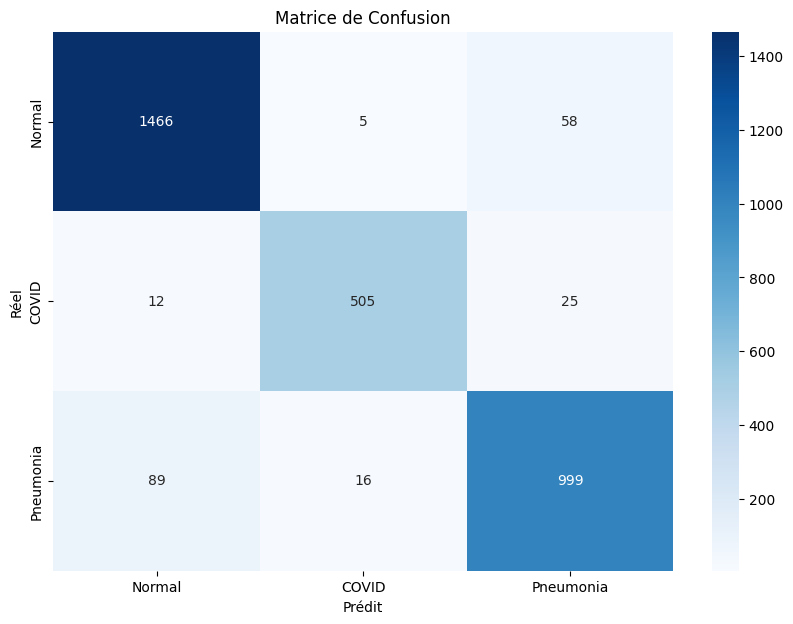

              precision    recall  f1-score   support

      Normal     0.9355    0.9588    0.9470      1529
       COVID     0.9601    0.9317    0.9457       542
   Pneumonia     0.9233    0.9049    0.9140      1104

    accuracy                         0.9354      3175
   macro avg     0.9396    0.9318    0.9356      3175
weighted avg     0.9355    0.9354    0.9353      3175



In [ ]:
# Evaluation par les métriques
model.load_state_dict(torch.load('best_model.pth'))
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Matrice de confusion
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'COVID', 'Pneumonia'],
                yticklabels=['Normal', 'COVID', 'Pneumonia'])
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.title('Matrice de Confusion')
    plt.show()
    
    # Rapport détaillé
    print(classification_report(all_labels, all_preds, 
                              target_names=['Normal', 'COVID', 'Pneumonia'],
                              digits=4))

# À exécuter sur le test set
evaluate_model(model, test_loader)

In [ ]:
# Évaluation finale
print("Testing model...")
model.load_state_dict(torch.load('best_model.pth'))
test_acc = evaluate(model, test_loader)
print(f"Final Test Accuracy: {test_acc:.2f}%")

Testing model...


C:\Users\Nekena\AppData\Local\Temp\ipykernel_14896\2555849374.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Validation Accuracy: 93.54%
Final Test Accuracy: 93.54%
